## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Read the mouse data and the study results
mouse_metadata = pd.read_csv("data/Mouse_metadata.csv")
study_results = pd.read_csv("data/Study_results.csv")

# Combine the data into a single dataset
results=pd.merge(study_results,mouse_metadata,on="Mouse ID", how="left")

# Display the data table for preview
results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_nunique=results["Mouse ID"].nunique()
print(mouse_nunique)

249


In [3]:
print(len(results["Mouse ID"].unique()))

249


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = results.loc[results.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = results.loc[results["Mouse ID"] == "g989"]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
results_clean = results[results['Mouse ID'].isin(duplicate_mouse_ids)==False]
# results_clean=pd.DataFrame.drop_duplicates(results)
# mouse_clean=results_clean["Mouse ID"].nunique()
print(len(results_clean["Mouse ID"].unique()))

248


## Summary Statistics

In [7]:
# Checking the number of mice in the clean DataFrame.
clean_study_data_complete = results[results['Mouse ID'].isin(duplicate_mouse_ids)==False]
clean_study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: mean, median, variance, standard deviation, and SEM of the tumor volume. 
regimen_group= results_clean.groupby(["Drug Regimen"])

avg_regimen = round(regimen_group["Tumor Volume (mm3)"].mean(),2)
median_regimen = round(regimen_group["Tumor Volume (mm3)"].median(),2)
var_regimen = round(regimen_group["Tumor Volume (mm3)"].var(),2)
std_regimen = round(regimen_group["Tumor Volume (mm3)"].std(),2)
sem_regimen = round(regimen_group["Tumor Volume (mm3)"].sem(),2)

# Assemble the resulting series into a single summary dataframe.
mouse_summary=pd.DataFrame({"Avg": avg_regimen,
                           "Median": median_regimen,
                           "Variance": var_regimen,
                           "Std Dev": std_regimen,
                          "SEM": sem_regimen
                           })
mouse_summary




,Avg,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

Text(0, 0.5, 'Mice Count')

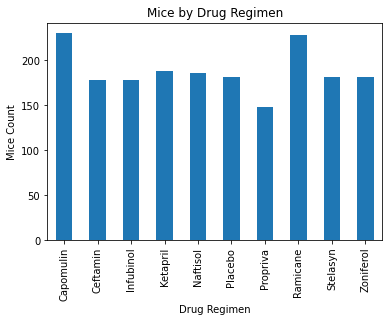

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mice_regimen=results_clean.groupby(["Drug Regimen"]).count()["Mouse ID"]

mice_regimen.plot(kind="bar")
plt.title("Mice by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Count")

Text(0, 0.5, 'Mice Count')

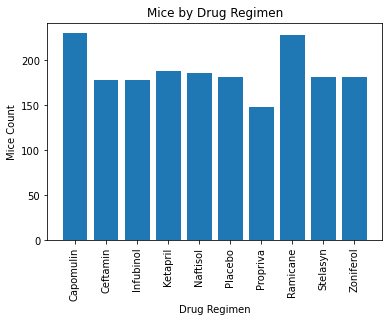

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis=np.arange(len(mice_regimen))
plt.bar(x_axis,mice_regimen,align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"], rotation="vertical")

plt.title("Mice by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Count")

Text(0.5, 1.0, 'Mice by Sex')

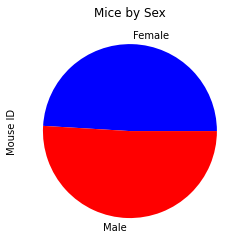

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_sex=results_clean.groupby(["Sex"]).count()["Mouse ID"]
colors=["blue","red"]
mice_sex.plot(kind="pie",colors=colors)
plt.title("Mice by Sex")

Text(0.5, 1.0, 'Mice by Sex')

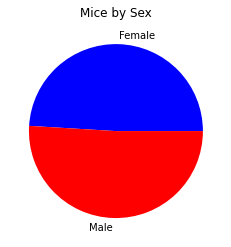

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sizes=mice_sex
labels=["Female","Male"]

plt.pie(mice_sex,colors=colors,labels=labels)
plt.title("Mice by Sex")


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint=results_clean.groupby(["Mouse ID"])["Timepoint"].max()
max_timepoint=max_timepoint.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
results_max_timepoint=max_timepoint.merge(results_clean,on=["Mouse ID","Timepoint"],how="left")
results_max_timepoint

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    tumor_vol_drug=results_max_timepoint[results_max_timepoint["Drug Regimen"]==drug]["Tumor Volume (mm3)"]
    tumor_data.append(tumor_vol_drug)
    
    quartiles=tumor_vol_drug.quantile([.25,.5,.75])
    lowerq=quartiles[0.25]
    upperq=quartiles[0.75]
    iqr=upperq-lowerq
    
    # Determine outliers using upper and lower bounds
   
    lowerb=lowerq-(1.5*iqr)
    upperb=upperq+(1.5*iqr)
    outlier=tumor_vol_drug.loc[(tumor_vol_drug>upperb) | (tumor_vol_drug<lowerb)]
   
    print(f"{drug}: {outlier}")

Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


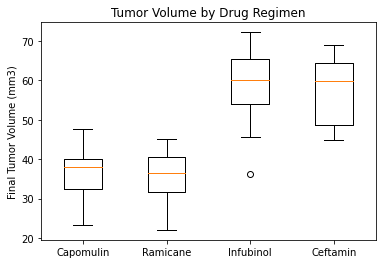

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_data, labels=treatments)
plt.title("Tumor Volume by Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

['b128' 'j246' 'r554' 's185' 'b742' 'x401' 'l509' 's710' 'r157' 'u364'
 'j119' 'v923' 'w914' 'i738' 'r944' 'y793' 'g316' 'g288' 'l897' 'w150'
 't565' 'i557' 'm957' 'f966' 'm601']
Select one of the above micem601


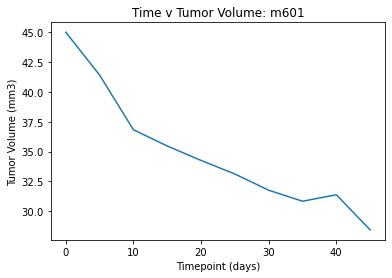

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
print(results_clean["Mouse ID"].loc[results_clean["Drug Regimen"]=="Capomulin"].unique())
mouse_select=input("Select one of the above mice")

capo_timevtumor=results_clean[results_clean["Mouse ID"].isin([mouse_select])]
capo_timevtumor_data = capo_timevtumor[["Mouse ID","Timepoint","Tumor Volume (mm3)"]]
plt.plot(capo_timevtumor_data["Timepoint"],capo_timevtumor_data["Tumor Volume (mm3)"])
plt.title("Time v Tumor Volume: "+mouse_select)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

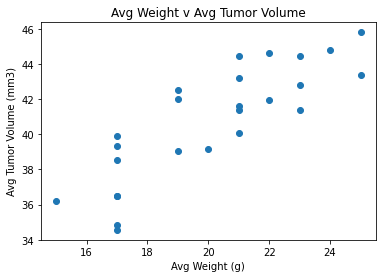

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capo_scatter=results_clean[results_clean["Drug Regimen"].isin(["Capomulin"])]
capo_scatter_avg=capo_scatter.groupby(["Mouse ID"]).mean()
plt.scatter(capo_scatter_avg["Weight (g)"],capo_scatter_avg["Tumor Volume (mm3)"])
plt.title("Avg Weight v Avg Tumor Volume")
plt.xlabel("Avg Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.show

## Correlation and Regression

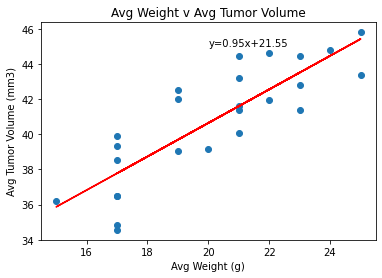

R^2=0.8419363424694718


In [18]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_val = capo_scatter_avg["Weight (g)"]
y_val = capo_scatter_avg["Tumor Volume (mm3)"]
(slope,intercept,rvalue,pvalue,stderr)=st.linregress(x_val,y_val)
regress_val=x_val*slope+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_val,"r-")
plt.title("Avg Weight v Avg Tumor Volume")
plt.xlabel("Avg Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.annotate(line_eq,(20,45))
plt.show()
print(f"R^2={rvalue}")

Insights
1) Capomulin and Ramicane have the lowest average tumor volume with the smallest variance, making it arguably the most consistent drug.  In the box plots, it is notoicable that Capomulin and Ramicane are different than Infubinol and Ceftamin
2) The low outlier in infubinol - Mouse c3266, is an outlier because they only woked through 2 timepoints
3) There is a positive association with the Capomulin drug treatment in the mouse's average weight and average tumor volume. In most mice taking Capomulin, there is a negative association between time and tumor volume.